In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import spacy
import re
import numpy as np
from sklearn.cluster.bicluster import SpectralCoclustering
from os import listdir
from os.path import isfile, join
from collections import Counter


In [1]:
def get_join_data(route):

    files = [file for file in listdir(route) if isfile(join(route, file))]
    data_frames = [pd.read_csv(route + file) for file in files]
    data_analyzed = pd.concat(data_frames)
    data_analyzed = data_analyzed.reset_index(drop=True)
    data_analyzed = data_analyzed.drop_duplicates(subset=["id"])

    return data_analyzed

In [228]:
DATA_BASE_TEXT_ROUTE = "C:\\Users\\Sectorea\\Code\\linkedin\\database_linkedin\\text_analyzed\\"
data_analyzed = get_join_data(DATA_BASE_TEXT_ROUTE)
data_analyzed.shape

(5534, 14)

In [61]:
cluster_data = pd.DataFrame(columns=["job_id", "key_word"])
cluster_data

,job_id,key_word


In [62]:
shape = data_analyzed.shape[0]
for i in range(0, shape): 
    try:
        words = data_analyzed.key_words[i].split(" ")
        job_id = [data_analyzed.id[i]]*len(words)
        xtra = {"job_id": job_id, "key_word": words}
        cluster_data = cluster_data.append(pd.DataFrame(xtra))
    except:
        pass

In [63]:
cluster_data.shape

(24087, 2)

In [239]:
cluster_data["value"] = 1
data = cluster_data.pivot_table(index="job_id", columns="key_word", values="value")
data.fillna(0, inplace=True)

In [336]:
data

key_word,agile,ai,angular,ansible,aws,azure,backend,bitbucket,blockchain,clojure,...,spark,sql,sqoop,ssas,startup,tableau,tensorflow,virtualization,visualisation,windows
job_id,,,,,,,,,,,,,,,,,,,,,
221309913,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
762877504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
762887076,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
798201080,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1008376316,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1833248614,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1833256042,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1833288141,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [67]:
data.sum(axis=0)[40:65]

key_word
kpi                  91.0
kubeflow             36.0
kubernetes          300.0
kudu                  1.0
linux               404.0
lucene               21.0
mathematic          754.0
matlab               87.0
micromanagement       5.0
microservice        226.0
mining              413.0
mongo               171.0
neo                  47.0
nifi                 12.0
nlp                 274.0
node                235.0
postgre             205.0
postgresql            3.0
powerbi               1.0
pyspark              18.0
python             2459.0
pytorch              62.0
qlik                110.0
qliksense             1.0
qlikview             20.0
dtype: float64

In [68]:
inds_users_aux = np.where(np.std(data) != 0)[0]
data = data.iloc[:,inds_users_aux] # remove users with all elements == 0
inds_movies_aux = np.where(np.std(data, axis=1) != 0)[0]
data = data.iloc[inds_movies_aux,:] # remove movies with all elements == 0
X = np.array(data)

In [69]:
X.shape

(4771, 83)

In [205]:
from sklearn.cluster import SpectralClustering, SpectralBiclustering, SpectralCoclustering, KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import calinski_harabasz_score, silhouette_score
import scipy.cluster.hierarchy as sch

<Figure size 1152x576 with 0 Axes>

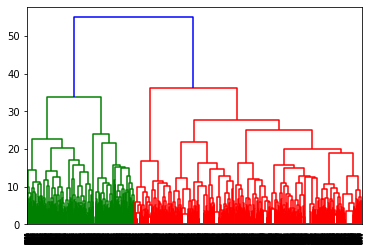

<Figure size 1152x576 with 0 Axes>

In [207]:
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.figure(figsize=(16,8))

In [210]:
clustering = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
clustering.fit(X)
y_cocluster = clustering.labels_

In [251]:
data_analyzed.id.dtype

dtype('int64')

In [252]:
data_cluster = pd.DataFrame(list(zip(y_cocluster, data.index)), columns= ["cluster", "id"])

In [273]:
final_data = data_analyzed.merge(data_cluster, on="id", how="left")
final_data = final_data.groupby('cluster')['key_words'].apply(lambda x: ' '.join(x)).reset_index()
final_data

,cluster,key_words
0,0.0,sql tableau kpi crm mining mathematic java hiv...
1,1.0,scala spark hive sql kafka sqoop flume nifi hd...
2,2.0,r python r sql mathematic python r sql tableau...
3,3.0,python r sql scrum visualisation aws cloud pyt...


In [323]:
final_list = final_data.key_words[0].split(" ")
dict_cluster = dict(Counter(final_list).most_common())
data_cluster_words_total = pd.DataFrame(dict_cluster.values(), index=dict_cluster.keys(), columns=["cluster_0"])

for i in range(1,4):
    final_list = final_data.key_words[i].split(" ")
    dict_cluster = dict(Counter(final_list).most_common())
    data_cluster_words = pd.DataFrame(dict_cluster.values(), index=dict_cluster.keys(), columns=["cluster_" + str(i)])
    data_cluster_words_total = data_cluster_words_total.join(data_cluster_words)
data_cluster_words_total

,cluster_0,cluster_1,cluster_2,cluster_3
python,791,471.0,467.0,730.0
sql,762,361.0,367.0,473.0
agile,658,168.0,48.0,251.0
ai,614,151.0,18.0,188.0
cloud,488,321.0,42.0,657.0
...,...,...,...,...
sagemaker,2,37.0,3.0,11.0
kubeflow,1,33.0,NaN,2.0
kudu,1,NaN,NaN,NaN
qliksense,1,NaN,NaN,NaN


In [330]:
data_cluster_words_total["cluster_0_per"] = data_cluster_words_total["cluster_0"]/data_cluster_words_total["cluster_0"].sum()*100
data_cluster_words_total["cluster_1_per"] = data_cluster_words_total["cluster_1"]/data_cluster_words_total["cluster_1"].sum()*100
data_cluster_words_total["cluster_2_per"] = data_cluster_words_total["cluster_2"]/data_cluster_words_total["cluster_2"].sum()*100
data_cluster_words_total["cluster_3_per"] = data_cluster_words_total["cluster_3"]/data_cluster_words_total["cluster_3"].sum()*100
data_cluster_words_total

,cluster_0,cluster_1,cluster_2,cluster_3,cluster_0_per,cluster_1_per,cluster_2_per,cluster_3_per
python,791,471.0,467.0,730.0,9.346567,8.034800,18.299373,10.328240
sql,762,361.0,367.0,473.0,9.003899,6.158308,14.380878,6.692134
agile,658,168.0,48.0,251.0,7.775021,2.865916,1.880878,3.551217
ai,614,151.0,18.0,188.0,7.255110,2.575913,0.705329,2.659875
cloud,488,321.0,42.0,657.0,5.766277,5.475947,1.645768,9.295416
...,...,...,...,...,...,...,...,...
sagemaker,2,37.0,3.0,11.0,0.023632,0.631184,0.117555,0.155631
kubeflow,1,33.0,NaN,2.0,0.011816,0.562948,NaN,0.028297
kudu,1,NaN,NaN,NaN,0.011816,NaN,NaN,NaN
qliksense,1,NaN,NaN,NaN,0.011816,NaN,NaN,NaN


In [326]:
calis = []
sil = []
range_list = range(2, 20)
for n in range_list:
    # clustering = KMeans(n_clusters=n, random_state=0)
    clustering = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    clustering.fit(X)
    y_cocluster = clustering.labels_
    calis.append(calinski_harabasz_score(X, y_cocluster))
    sil.append(silhouette_score(X, y_cocluster, metric='euclidean'))
    print(n, Counter(y_cocluster))

2 Counter({0: 3233, 1: 1538})


KeyboardInterrupt: 

In [332]:
X.shape

(4771, 83)

In [333]:
calis = []
sil = []
range_list = range(2, 20)
for n in range_list:
    clustering = SpectralCoclustering(n_clusters=n, random_state=0)
    # clustering = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward')
    clustering.fit(X)
    y_cocluster = clustering.column_labels_
    print(n, Counter(y_cocluster))

2 Counter({1: 69, 0: 14})
3 Counter({1: 56, 0: 24, 2: 3})
4 Counter({2: 55, 0: 24, 3: 3, 1: 1})
5 Counter({0: 56, 1: 23, 3: 2, 4: 2})
6 Counter({2: 55, 0: 23, 1: 2, 5: 2, 4: 1})
7 Counter({0: 38, 5: 29, 1: 11, 6: 2, 4: 2, 3: 1})
8 Counter({7: 34, 0: 17, 4: 16, 2: 11, 6: 2, 1: 2, 3: 1})
9 Counter({7: 42, 2: 21, 0: 15, 4: 2, 5: 2, 6: 1})
10 Counter({1: 38, 9: 29, 4: 11, 0: 2, 3: 2, 2: 1})
11 Counter({0: 30, 4: 22, 9: 15, 8: 11, 3: 2, 5: 2, 1: 1})
12 Counter({7: 29, 11: 24, 2: 14, 0: 11, 4: 2, 5: 2, 9: 1})
13 Counter({12: 31, 0: 18, 4: 18, 8: 11, 5: 2, 3: 1, 11: 1, 1: 1})
14 Counter({12: 32, 0: 18, 4: 17, 8: 11, 5: 2, 3: 1, 11: 1, 1: 1})
15 Counter({11: 25, 1: 22, 13: 14, 4: 9, 9: 8, 3: 2, 10: 1, 0: 1, 2: 1})
16 Counter({11: 26, 1: 21, 13: 13, 9: 7, 15: 6, 4: 5, 3: 2, 10: 1, 0: 1, 2: 1})
17 Counter({2: 28, 12: 17, 0: 11, 15: 9, 6: 8, 9: 5, 13: 1, 8: 1, 3: 1, 16: 1, 1: 1})
18 Counter({8: 28, 11: 14, 16: 11, 0: 8, 1: 7, 14: 5, 7: 5, 9: 1, 12: 1, 3: 1, 15: 1, 13: 1})
19 Counter({8: 28, 11: 1

In [363]:
for n in range(30, 50):
    print("-------------CLUSTER----------" + str(n))
    clustering = SpectralCoclustering(n_clusters=n, random_state=0).fit(X)
    y_cocluster = clustering.column_labels_
    word_cluster = pd.DataFrame({"cluster": y_cocluster, "key_word": data.columns})
    word_cluster = word_cluster.groupby('cluster')['key_word'].apply(lambda x: ' '.join(x)).reset_index()
    for i in range(0,len(word_cluster)):
        print(i, word_cluster.key_word[i])

-------------CLUSTER----------30
0 angular backend frontend github javascript kotlin node redis redux scrum
1 hive knime python
2 crm
3 kpi
4 ai startup
5 dashboard mining qlik qliksense qlikview qubole tableau visualisation
6 agile ansible bitbucket docker gitlab jenkins lucene microservice postgre postgresql
7 kudu
8 keras kubeflow pytorch sagemaker tensorflow
9 micromanagement
10 matlab
11 cloudera databricks google hadoop hdfs impala neo nifi scala spark
12 blockchain
13 jupyter nlp pyspark sklearn
14 aws azure clojure cloud elasticsearch flume gcp java kafka kinesis kubernetes linux mongo sqoop windows
15 confluence jira powerbi
16 etl kibana sql ssas
17 mathematic r
18 virtualization
-------------CLUSTER----------31
0 angular backend frontend github javascript kotlin node redis redux scrum
1 hive knime python
2 crm
3 kpi
4 ai startup
5 dashboard mining qlik qliksense qlikview qubole tableau visualisation
6 agile ansible bitbucket docker gitlab jenkins lucene microservice postgre 

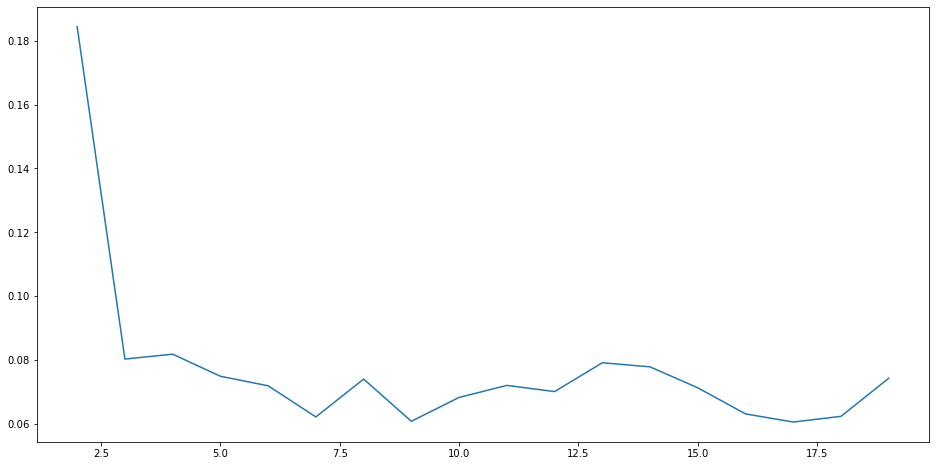

In [197]:
plt.figure(figsize=(16,8))
plt.plot(range_list, sil)

In [48]:
clustering = SpectralClustering(n_clusters=5, random_state=0).fit(X)
clustering.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
Counter(clustering.labels_)

Counter({0: 4736, 4: 16, 1: 2, 3: 11, 2: 6})

In [70]:
for n in range(3, 20):
    clustering = SpectralCoclustering(n_clusters=n, random_state=0)
    clustering.fit(X)
    y_cocluster = clustering.row_labels_
    distortions = []
K = range(2,20)
    print(n, Counter(y_cocluster))

3 Counter({1: 2749, 0: 1879, 2: 143})
4 Counter({2: 2705, 0: 1820, 3: 179, 1: 67})
5 Counter({0: 2748, 1: 1848, 3: 105, 4: 54, 2: 16})
6 Counter({2: 2723, 0: 1807, 1: 136, 5: 57, 4: 32, 3: 16})
7 Counter({5: 1867, 0: 1697, 1: 976, 6: 126, 4: 57, 3: 32, 2: 16})
8 Counter({7: 1778, 4: 1388, 2: 731, 0: 659, 6: 120, 1: 47, 3: 32, 5: 16})
9 Counter({7: 2223, 0: 1570, 2: 767, 4: 113, 5: 48, 8: 31, 3: 16, 6: 2, 1: 1})
10 Counter({9: 1855, 1: 1705, 4: 985, 0: 129, 3: 47, 7: 31, 6: 16, 5: 2, 8: 1})
11 Counter({0: 1617, 4: 1458, 8: 947, 9: 532, 3: 120, 5: 47, 6: 31, 2: 16, 7: 2, 10: 1})
12 Counter({7: 1572, 11: 1558, 0: 938, 2: 471, 4: 109, 10: 40, 5: 33, 8: 31, 3: 16, 6: 2, 1: 1})
13 Counter({12: 1687, 4: 1364, 8: 758, 0: 675, 3: 118, 11: 46, 9: 40, 5: 33, 6: 31, 2: 16, 7: 2, 10: 1})
14 Counter({12: 1687, 4: 1361, 8: 757, 0: 677, 3: 118, 11: 46, 9: 40, 5: 33, 6: 31, 2: 16, 7: 2, 13: 2, 10: 1})
15 Counter({1: 1243, 11: 1227, 9: 1030, 4: 551, 13: 442, 10: 107, 0: 46, 12: 40, 3: 33, 7: 31, 6: 16, 

In [331]:
for n in range(1,30):
    cocluster = SpectralBiclustering(n_clusters=n, random_state=0,method='log')
    cocluster.fit(X)
    y_cocluster = cocluster.column_labels_
    print(n, collections.Counter(y_cocluster))

1 Counter({0: 72})
2 Counter({0: 69, 1: 3})
3 Counter({0: 59, 2: 10, 1: 3})
4 Counter({0: 59, 1: 7, 3: 3, 2: 3})
5 Counter({0: 58, 3: 6, 2: 3, 1: 3, 4: 2})
6 Counter({0: 51, 4: 11, 5: 5, 2: 3, 1: 1, 3: 1})
7 Counter({0: 51, 4: 10, 5: 5, 2: 3, 1: 1, 6: 1, 3: 1})
8 Counter({1: 53, 4: 7, 5: 5, 0: 3, 6: 1, 7: 1, 2: 1, 3: 1})
9 Counter({1: 52, 4: 7, 5: 5, 0: 3, 6: 1, 7: 1, 2: 1, 8: 1, 3: 1})
10 Counter({0: 51, 8: 7, 4: 5, 1: 3, 5: 1, 6: 1, 9: 1, 3: 1, 7: 1, 2: 1})
11 Counter({0: 49, 9: 7, 5: 5, 1: 3, 4: 2, 7: 1, 8: 1, 10: 1, 6: 1, 3: 1, 2: 1})
12 Counter({0: 45, 9: 6, 11: 6, 5: 5, 4: 2, 1: 2, 7: 1, 8: 1, 10: 1, 6: 1, 3: 1, 2: 1})
13 Counter({0: 42, 12: 6, 9: 5, 5: 5, 11: 4, 4: 2, 1: 2, 7: 1, 8: 1, 10: 1, 6: 1, 3: 1, 2: 1})
14 Counter({1: 42, 13: 9, 9: 5, 12: 4, 5: 2, 2: 2, 7: 1, 0: 1, 11: 1, 10: 1, 4: 1, 6: 1, 3: 1, 8: 1})
15 Counter({1: 42, 14: 9, 4: 4, 11: 3, 9: 3, 0: 2, 6: 1, 7: 1, 10: 1, 12: 1, 5: 1, 2: 1, 8: 1, 3: 1, 13: 1})
16 Counter({0: 42, 12: 6, 9: 5, 11: 4, 5: 3, 4: 2, 7: 1, 8: 1

In [322]:
print("Performing the coclustering...")
cocluster.fit(X)
y_cocluster = cocluster.column_labels_

Performing the coclustering...


In [323]:
collections.Counter(y_cocluster)

Counter({6: 1, 7: 1, 1: 53, 0: 3, 4: 7, 5: 5, 2: 1, 3: 1})

In [308]:
y_cocluster

array([7, 7, 1, ..., 1, 7, 7])

In [309]:
cocluster.n_clusters

8

In [310]:
data.index

Int64Index([ 221309913,  762877504,  762887076,  798201080, 1008376316,
            1065140776, 1087403280, 1087608876, 1135576335, 1135576364,
            ...
            1827242160, 1827242177, 1827242185, 1827242217, 1827242252,
            1827243065, 1827293772, 1827345681, 1827354831, 1827358129],
           dtype='int64', name='job_id', length=2512)

In [311]:
values_dict = {}
for word, cluster in zip(data.index, y_cocluster):

    values_dict[word] = cluster


In [312]:
for key, value in values_dict.items():

    if value==9:

        print(key)

In [174]:
cocluster = SpectralCoclustering(n_clusters=16, random_state=0).fit(X)

In [175]:
cmap = plt.cm.bwr

sorted_rows_inds = np.argsort(cocluster.row_labels_)
sorted_cols_inds = np.argsort(cocluster.column_labels_)

fit_data = X[sorted_rows_inds]
fit_data = fit_data[:, sorted_cols_inds]

In [176]:
vmax = max([abs(X.min()), abs(X.max())])
vmax = 0.001

In [177]:
def reduce_X(X, row_factor=50, col_factor=50):
    nrows, ncols = np.shape(X)
#    nrows_red = nrows//row_factor
#    ncols_red = ncols//col_factor
    nrows_red = int(np.ceil(nrows/row_factor))
    ncols_red = int(np.ceil(ncols/col_factor))
    reducida = np.zeros((nrows_red, ncols_red))
    aux_row = 0
    for row in range(nrows_red):
        if row % 10 == 0:
            print("{} / {}".format(row+1, nrows_red))
        aux_col = 0
        for col in range(ncols_red):
            reducida[row,col] = X[aux_row:(aux_row+row_factor),
                                  aux_col:(aux_col+col_factor)].mean()
            aux_col += col_factor
        aux_row += row_factor
    return reducida

In [178]:
row_factor = 100
col_factor = 1
reducida_X = reduce_X(X, row_factor=row_factor, col_factor=col_factor)
reducida_fit_data = reduce_X(fit_data, row_factor=row_factor, col_factor=col_factor)

1 / 48
11 / 48
21 / 48
31 / 48
41 / 48
1 / 48
11 / 48
21 / 48
31 / 48
41 / 48


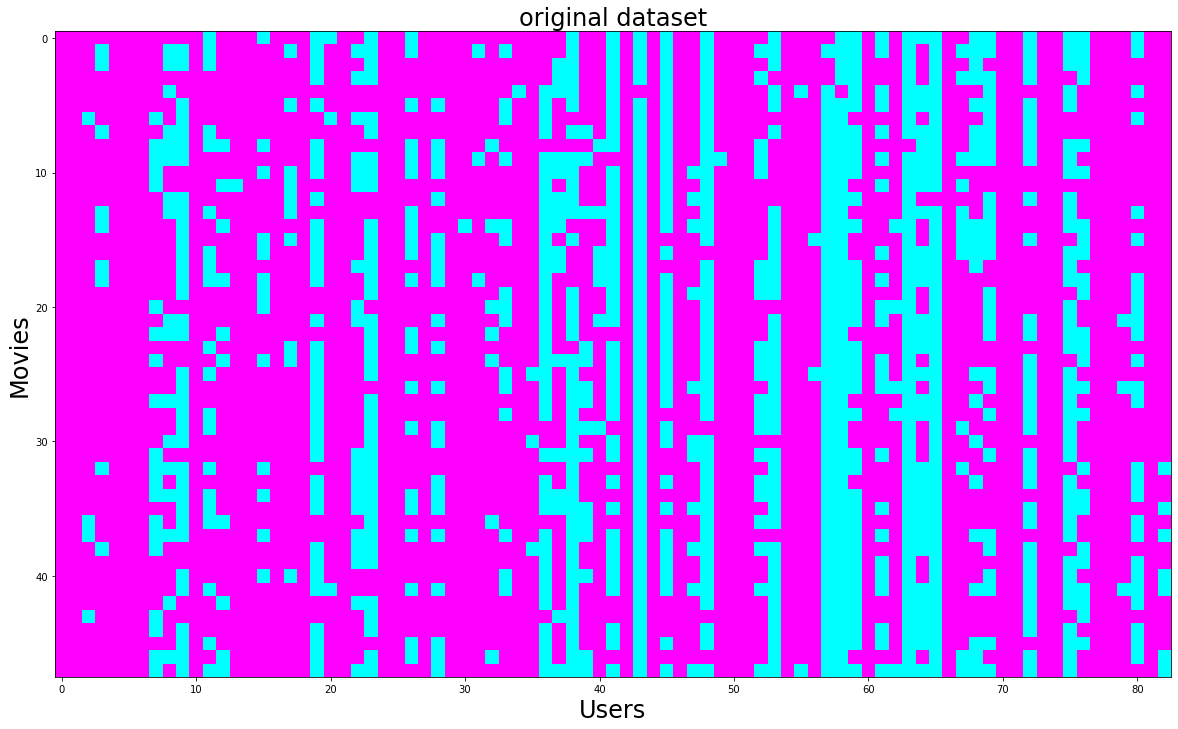

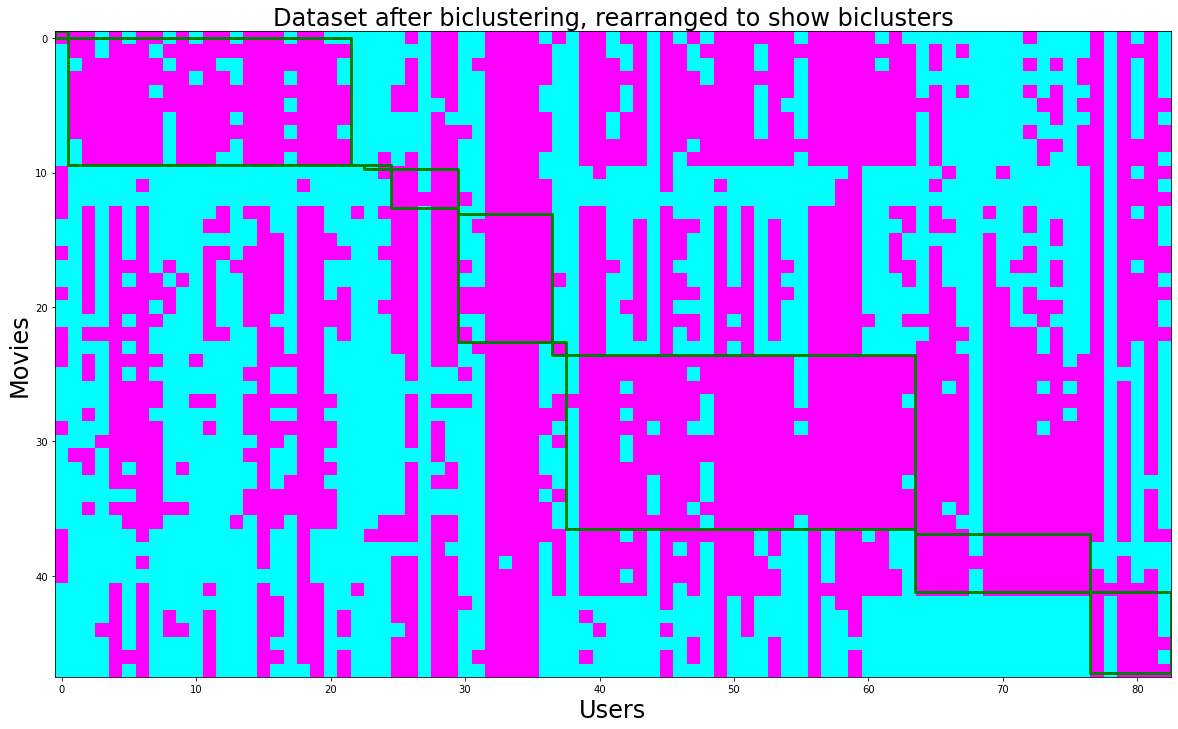

In [179]:
cmap = plt.cm.cool
n_clusters = cocluster.n_clusters

plt.figure(figsize=(20,20))
#plt.subplot(1,2,1)
plt.imshow(reducida_X, cmap=cmap, vmin=0, vmax=vmax, aspect=1)
#plt.xticks(range(len(np.array(feature_names)[::col_factor]))[::10],
#           np.array(feature_names)[::col_factor][::10],
#           fontsize=14, rotation=85)
plt.title("original dataset", fontsize=24)
plt.xlabel('Users', fontsize=24)
plt.ylabel('Movies', fontsize=24)
plt.show()

plt.figure(figsize=(20,20))
#plt.subplot(1,2,2)
plt.imshow(reducida_fit_data, cmap=cmap, vmin=0, vmax=vmax, aspect=1)
#plt.xticks(range(len(np.array(feature_names)[::col_factor]))[::10],
#           np.array(feature_names)[sorted_cols_inds][::col_factor][::10],
#           fontsize=14, rotation=85)
plt.title("Dataset after biclustering, rearranged to show biclusters", fontsize=24)
corner_y = -0.5
c = 0
for i in range(n_clusters):
    corner_x = -0.5
    for j in range(n_clusters):
#        sh = cocluster.get_shape(i)
        sh = [cocluster.get_shape(i)[0]/row_factor,
              cocluster.get_shape(j)[1]/col_factor]
        if i==j:
            plt.plot([corner_x, corner_x+sh[1], corner_x+sh[1], corner_x, corner_x],
                     [corner_y, corner_y, corner_y+sh[0], corner_y+sh[0], corner_y], 'g', linewidth=3)
        corner_x += sh[1]
        c += 1
    corner_y += sh[0]
plt.xlabel('Users', fontsize=24)
plt.ylabel('Movies', fontsize=24)
plt.show()

In [101]:
from sklearn.cluster import KMeans, spectral_clustering, DBSCAN
import collections
from sklearn import metrics

In [294]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(data)

In [102]:
labels = spectral_clustering(data, n_clusters=k)

ValueError: array must be 2-dimensional and square. shape = (2512, 72)

In [84]:
kmeans.labels_

array([2, 4, 2, ..., 3, 1, 1])

In [86]:
collections.Counter(kmeans.labels_)

Counter({2: 260, 4: 442, 3: 395, 1: 973, 0: 442})

In [116]:
distortions = []
K = range(2,20)
db = DBSCAN(eps=1.1, min_samples=10).fit(data)
collections.Counter(db.labels_)
# distortions.append(metrics.calinski_harabasz_score(data, db.labels_))

Counter({-1: 1096, 0: 1398, 2: 8, 1: 10})

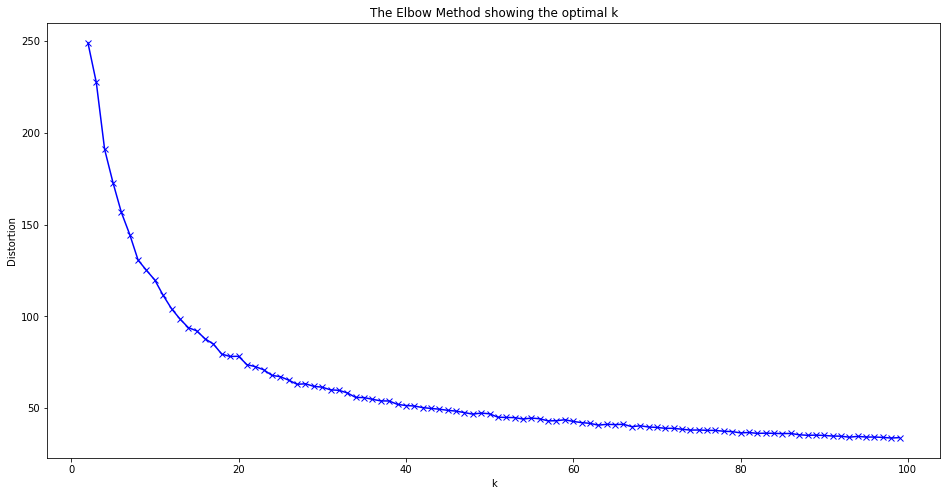

In [99]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()